<a href="https://colab.research.google.com/github/stsan9/EndoMondoResearchERSP/blob/master/Machine_Learning_Model_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
from random import sample 
import statistics
from datetime import datetime

In [2]:
# Mount the google drive file system
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [4]:
path = '/content/gdrive/My Drive/McAuley/UserTimeTable.csv'
user_time_table = pd.read_csv(path)
user_time_table.head(2)

user_median  recent_workouts  ...  recent_month2  time_int_deviation
0    71.240139                0  ...              8          122.811904
1    83.151667                0  ...              2          154.344158

[2 rows x 19 columns]

In [0]:
def time_scale(num):
  return num/60/60

In [0]:
all_users=dataframe["userId"].unique()
saved_stamps = list(dataframe['time_start'])
times = []
for user in all_users:
  user_data = dataframe.loc[dataframe["userId"] == user].sort_values("time_start")
  arr = np.diff(user_data["time_start"])
  arr=np.append(arr,[0])
  user_data["time_start"]=arr.tolist()
  indexNames = dataframe[dataframe["userId"] == user].index
  dataframe.drop(indexNames,inplace=True)
  dataframe = dataframe.append(user_data,ignore_index = True)

dataframe = dataframe.rename( columns= { "time_start" : "hrs_to_next" } )
dataframe['time_start'] = saved_stamps
dataframe['hrs_to_next'] = dataframe['hrs_to_next'].apply(time_scale)

In [0]:
df = dataframe.copy()
df = df[df['hrs_to_next'] != 0]
median_gap = np.median(df['hrs_to_next'])
print(median_gap/24)

1.9372280092592593


In [0]:
#Converting hrs_to_next to month ranges
def hrs_to_month(num):
  return num/24/30
dataframe["months_to_next"]=dataframe["hrs_to_next"].apply(hrs_to_month)

In [0]:
#Converting time_start to number of month
def extract_month(num):
  date=datetime.fromtimestamp(num)
  return date.month
dataframe["month"]=dataframe["time_start"].apply(extract_month)

In [0]:
user_time_table = pd.DataFrame(columns=['userId', 'median_hrs_to_next', 'workout_in_median'])

variable_dict = {'user_median': [], 'recent_workouts': [], 'workout_soon': [], 'recent_sport': [], 'recent_heart_rate': [], 'recent_speed': [], 'recent_distance': [],
                 'recent_altitude': [], 'good_users': [], 'hrs_to_next1': [], 'hrs_to_next2': [], 'gender_female': [], 'gender_male': [], 'gender_unknown': [], 'months_to_next1': [],
                 'months_to_next2': [], 'recent_month1': [], 'recent_month2': [], 'time_int_deviation': []}

for user in all_users:
  user_data = dataframe.loc[dataframe["userId"] == user].loc[dataframe['hrs_to_next'] != 0].sort_values("time_start", ascending=False)
  user_data['time_int_deviation'] = pd.DataFrame.std(user_data.hrs_to_next)   # calculate time deviation per user here
  if len(user_data) >= 20:
    variable_dict['good_users'].append(user)
    variable_dict['user_median'].append(np.median(user_data['hrs_to_next']))
    workouts = user_data[user_data['time_start'] >= (user_data['time_start'].iloc[1] - median_gap*60*60)]
    variable_dict['recent_workouts'].append(len(workouts) - 2)
    variable_dict['recent_sport'].append(user_data['sport'].iloc[1])
    variable_dict['workout_soon'].append(int(user_data['hrs_to_next'].iloc[1] <= median_gap))
    variable_dict['recent_heart_rate'].append(user_data['average_heart_rate'].iloc[1])
    variable_dict['recent_speed'].append(user_data['dervided_speed (km/h)'].iloc[1])
    variable_dict['recent_distance'].append(user_data['derived_distance (km)'].iloc[1])
    variable_dict['recent_altitude'].append(user_data['average_altitude'].iloc[1])
    variable_dict['hrs_to_next1'].append(user_data['hrs_to_next'].iloc[2])
    variable_dict['hrs_to_next2'].append(user_data['hrs_to_next'].iloc[3])
    variable_dict['months_to_next1'].append(user_data['months_to_next'].iloc[2])
    variable_dict['months_to_next2'].append(user_data['months_to_next'].iloc[3])
    variable_dict['gender_female'].append(user_data['gender_female'].iloc[1])
    variable_dict['gender_male'].append(user_data['gender_male'].iloc[1])
    variable_dict['gender_unknown'].append(user_data['gender_unknown'].iloc[1])
    variable_dict['recent_month1'].append(user_data['month'].iloc[2])
    variable_dict['recent_month2'].append(user_data['month'].iloc[3])
    variable_dict['time_int_deviation'].append(user_data['time_int_deviation'].iloc[1])

user_time_table = pd.DataFrame.from_dict(variable_dict)

In [0]:
user_time_table.to_csv(r'/content/gdrive/My Drive/McAuley/UserTimeTable.csv', index = False)

In [0]:
user_median: False,  recent_speed: True, recent_distance: False,  recent_altitude: True,  good_users: True, 
hrs_to_next1: False, months_to_next1: False, months_to_next2: False, time_int_deviation: False]

0, 5, 6, 7, 8, 9, 14, 15, 18




-0.60260127  -0.25570828  0.30269045 -0.31051816
    0.23870308 -0.41139014 -0.12942762 
   -0.41139014 -0.12942762  0.13250006 -0.18616737 

0, 4, 5, 6, 8, 9, 10, 14, 15, 16, 17

In [5]:
user_time_table

user_median  recent_workouts  ...  recent_month2  time_int_deviation
0      71.240139                0  ...              8          122.811904
1      83.151667                0  ...              2          154.344158
2      48.513056                0  ...              7         1052.916741
3     170.656667                0  ...              5         1676.756945
4      83.536250                0  ...             10         4890.654515
..           ...              ...  ...            ...                 ...
875    44.947917                0  ...              4          909.842827
876    73.405694                1  ...              7          106.096150
877   334.048889                0  ...              8         1738.123009
878    50.630139                1  ...             12          948.297247
879    83.720278                1  ...             12         1315.970615

[880 rows x 19 columns]

Covariance Matrix And Correlation Coefficient

In [6]:
covar = pd.DataFrame.cov(user_time_table)
covar

user_median  ...  time_int_deviation
user_median         3.154593e+03  ...        1.234153e+04
recent_workouts    -9.406107e+00  ...       -4.512913e+01
workout_soon       -5.673297e+00  ...       -3.135154e+01
recent_sport        1.189032e+01  ...        1.015473e+02
recent_heart_rate   8.505868e+01  ...        3.914928e+02
recent_speed       -5.614111e+01  ...       -3.190841e+02
recent_distance    -3.785737e+01  ...        1.895114e+01
recent_altitude    -5.307765e+02  ...        1.178864e+02
good_users         -1.719057e+07  ...       -2.625102e+08
hrs_to_next1        7.797431e+03  ...        1.160213e+05
hrs_to_next2        3.460679e+03  ...        7.223990e+04
gender_female       1.246619e+00  ...        4.212102e+00
gender_male        -1.303268e+00  ...       -2.532832e+00
gender_unknown      5.664908e-02  ...       -1.679270e+00
months_to_next1     1.082977e+01  ...        1.611407e+02
months_to_next2     4.806498e+00  ...        1.003332e+02
recent_month1      -3.665020e+01  ...       -1.951796e+02
recent_month2      -3.935883e+01  ...       -2.348616e+02
time_int_deviation  1.234153e+04  ...        2.671424e+05

[19 rows x 19 columns]

In [7]:
df1 = user_time_table.corr(method ='pearson') # pearson a
df1.iloc[:, [0, 5, 6, 7, 8, 9, 14, 15, 16]]

user_median  recent_speed  ...  months_to_next2  recent_month1
user_median            1.000000     -0.134089  ...         0.063961      -0.200731
recent_workouts       -0.245598      0.067789  ...        -0.006688       0.085608
workout_soon          -0.217799      0.069142  ...        -0.067818       0.033249
recent_sport           0.078009     -0.422956  ...         0.046949       0.021363
recent_heart_rate      0.078041     -0.012548  ...         0.043206      -0.010023
recent_speed          -0.134089      1.000000  ...        -0.009616      -0.004553
recent_distance       -0.032091      0.630955  ...         0.000801      -0.018255
recent_altitude       -0.027195     -0.082310  ...        -0.000236      -0.016591
good_users            -0.075432     -0.088693  ...        -0.063430      -0.000462
hrs_to_next1           0.128632     -0.057076  ...         0.218022      -0.008288
hrs_to_next2           0.063961     -0.009616  ...         1.000000       0.020468
gender_female          0.082521     -0.123066  ...        -0.030634      -0.012608
gender_male           -0.080669      0.101518  ...         0.033660       0.043468
gender_unknown         0.009073      0.035082  ...        -0.012977      -0.081969
months_to_next1        0.128632     -0.057076  ...         0.218022      -0.008288
months_to_next2        0.063961     -0.009616  ...         1.000000       0.020468
recent_month1         -0.200731     -0.004553  ...         0.020468       1.000000
recent_month2         -0.213661     -0.000367  ...         0.015257       0.933719
time_int_deviation     0.425134     -0.082816  ...         0.145088      -0.116164

[19 rows x 9 columns]

In [0]:
# Best results: 0, 5, 6, 7, 8, 9, 14, 15, 18
# All the features: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18


x = user_time_table.iloc[:, [0, 5, 6, 7, 8, 9, 14, 15, 18]].values
y = user_time_table.iloc[:, 2].values

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [0]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

# Hide

In [0]:
#@title SVM Model (RBF Kernel)


In [61]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
y_pred = classifier.predict(x_test)

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(cm[0][0])
print(cm[1][1])
print(cm[0][1])
print(cm[1][0])
print("SVM Accuracy (RBF): " + str((cm[0][0]+cm[1][1])/(cm[0][1]+cm[1][0]+cm[0][0]+cm[1][1])*100) + "%")

[[116   4]
 [ 48   8]]
116
8
4
48
SVM Accuracy (RBF): 72.09302325581395%


In [0]:
#@title SVM Model (Linear Kernel)


In [0]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
y_pred = classifier.predict(x_test)

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(cm[0][0])
print(cm[1][1])
print(cm[0][1])
print(cm[1][0])
print("SVC Accuracy (Linear): " + str((cm[0][0]+cm[1][1])/(cm[0][1]+cm[1][0]+cm[0][0]+cm[1][1])*100) + "%")

[[120   0]
 [ 56   0]]
120
0
0
56
SVC Accuracy (Linear): 68.18181818181817%


In [0]:
#@title KNN Model


In [0]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred = classifier.predict(x_test)

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(cm[0][0])
print(cm[1][1])
print(cm[0][1])
print(cm[1][0])
print("KNN Accuracy: " + str((cm[0][0]+cm[1][1])/(cm[0][1]+cm[1][0]+cm[0][0]+cm[1][1])*100) + "%")

[[103  17]
 [ 36  20]]
103
20
17
36
KNN Accuracy: 71.09826589595376%


# Logistic Regression


In [0]:
#@title Logistic Regression Model


In [171]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)
column_labels = user_time_table.columns
row_labels = ['Correlation']
print(classifier.coef_)
# df = pd.DataFrame(classifier.coef_, columns=column_labels, index=row_labels)
# df
# df = df.iloc[0].sort_values()
# df.head()

[[-0.63756184 -0.23677173  0.26254581 -0.28270095  0.24071207 -0.3866086
  -0.13738963 -0.3866086  -0.13738963  0.12467257 -0.17834826]]


In [172]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [173]:
np.round(classifier.coef_, decimals=2) > 0

array([[False, False,  True, False,  True, False, False, False, False,
         True, False]])

In [0]:
y_pred = classifier.predict(x_test)

In [175]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(cm[0][0])
print(cm[1][1])
print(cm[0][1])
print(cm[1][0])
print("Accuracy: " + str((y_test == y_pred).sum() / (len(x_test)) * 100) + "%")
print("Logistic Regression Accuracy: " + str((cm[0][0]+cm[1][1])/(cm[0][1]+cm[1][0]+cm[0][0]+cm[1][1])*100) + "%")

[[110  10]
 [ 45  11]]
110
11
10
45
Accuracy: 68.75%
Logistic Regression Accuracy: 68.75%


In [0]:
#Our Check: check if each user has a median time gap <= the median time gap of all users
count = 0
for i in range(len(user_time_table['workout_soon'])):
 if user_time_table['user_median'][i] <= median_gap and user_time_table['workout_soon'][i] == 1:
   count += 1
 if user_time_table['user_median'][i] > median_gap and user_time_table['workout_soon'][i] == 0:
   count += 1
print('Baseline Percent Accuracy: ' + str((count/len(user_time_table)) * 100) + '%')

Baseline Percent Accuracy: 69.54545454545455%


In [0]:
#McAuley Check: see if the second to last workout was in the median time gap
count = 0
for i in range(len(user_time_table['workout_soon'])):
 if user_time_table['hrs_to_next1'][i] <= median_gap and user_time_table['workout_soon'][i] == 1:
   count += 1
 if user_time_table['hrs_to_next1'][i] > median_gap and user_time_table['workout_soon'][i] == 0:
   count += 1
print('Baseline Percent Accuracy: ' + str((count/len(user_time_table)) * 100) + '%')

Baseline Percent Accuracy: 66.81818181818183%


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


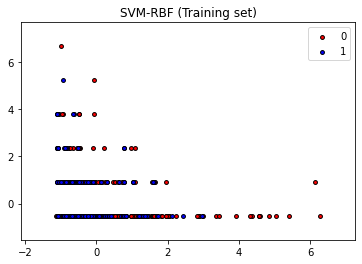

In [0]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j, s=15, edgecolors='k')
plt.title('SVM-RBF (Training set)')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


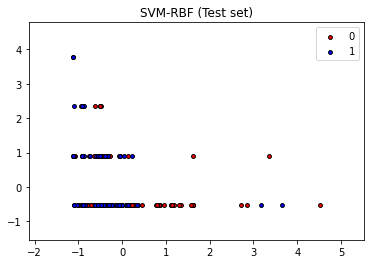

In [0]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j, s=15, edgecolors='k')
plt.title('SVM-RBF (Test set)')
plt.legend()
plt.show()